# Bike Sharing Assignment

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required Packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Reading and Inspection

In [3]:
# Importing the csv file

df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Inspecting the dataframe

print(df.shape)
print(df.info())
print(df.index)
print(df.columns)
df.describe()

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
RangeIndex(start=0, stop=730, step=1)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Inspecting the null values

print(df.isnull().sum())
print(df.isnull().sum(axis=1))

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64


# Exploratory Data Analysis (EDA)

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### We can see that below variables are not useful for our analysis.
    instant             = record index number 
    dteday              = already mnth, yr,weekday are present 
    atemp               = temperature is available as temp variable
    casual + registered = cnt(To predict any one variabe is enough and cnt is casual + registered)

In [8]:
# Droping the variables

df.drop(['instant','dteday','atemp','casual','registered'], axis=1 , inplace=True)

In [9]:
df.head() # Checking after drop

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### As per columns discription, we know that few variables are categorial variables.
    Changing the below variables into categorial variables
        season
        mnth
        weekday
        weathersit

In [10]:
#  season

def funct(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x== 3:
        return 'fall'
    else:
        return 'winter'
    
df['season'] = df['season'].apply( lambda x: funct(x))

In [11]:
# mnth

def funct(x):
    if x == 1:
        return 'Clear cloudy'
    elif x ==2: 
        return 'Mist cloudy' 
    elif x == 3:
        return 'Light Snow'
    else:
        return 'Heavy Rain'
df['weathersit'] = df['weathersit'].apply( lambda x: funct(x))

In [12]:
df.head() # varifying the change in updated variables

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear cloudy,9.305237,43.6957,12.522300,1600


In [13]:
# weekday

df['weekday'] = df['weekday'].replace(to_replace = [0,1,2,3,4,5,6] , value=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])


In [14]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear cloudy,9.305237,43.6957,12.522300,1600


In [15]:
# mnth

df['mnth'].replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12], value=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] , inplace=True)

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear cloudy,9.305237,43.6957,12.522300,1600


In [17]:
# checking the data types for the variables

df.dtypes 

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

   We can see here season, mnth , weekday ,and weathersit are now object types

In [18]:
# Checking for outliers

df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


We can observe that for most of the varibales there is no much difference between 75 percentile and max values.

But for few varibales we will see visually and try to understand more...

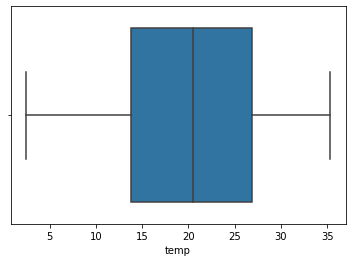

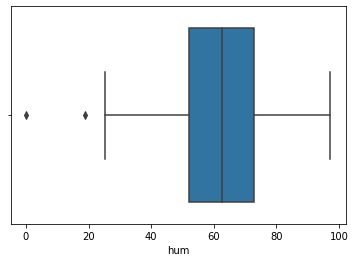

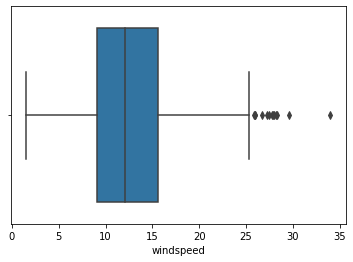

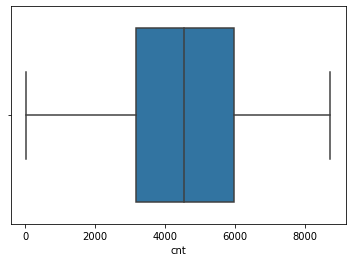

In [19]:
# Checking box plot's for the atemp','hum','windspeed','cnt' variables

vars = ['temp','hum','windspeed','cnt']
for i in vars:
    sns.boxplot(df[i])
    plt.show()

We could see that for hum and windspeed variables are having outliers. but we can ignore them as these are climate related variables.

### Understanding each variable individually

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


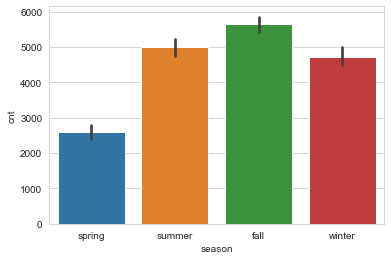

In [20]:
# Season

print(df['season'].value_counts())

sns.set_style('whitegrid')
sns.barplot(df['season'],df['cnt'])
#df['season'].value_counts().plot.bar()
plt.show()

We could see here, there is high demand of rental bikes on fall and summer season.

1    365
0    365
Name: yr, dtype: int64


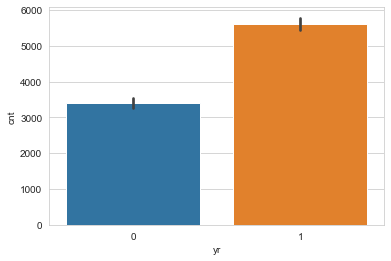

In [21]:
# yr

print(df['yr'].value_counts())

sns.set_style('whitegrid')
sns.barplot(df['yr'],df['cnt'])
plt.show()

We could see here, the counts of total rental bikes in 2019 is high when compare with staring year 2018.

0    709
1     21
Name: holiday, dtype: int64


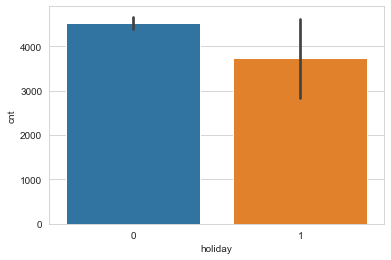

In [22]:
# holiday

print(df['holiday'].value_counts())

sns.set_style('whitegrid')
sns.barplot(df['holiday'],df['cnt'])
plt.show()

Here, we could see that there is a high chance of bikes rental on non-holidays times 

1    499
0    231
Name: workingday, dtype: int64


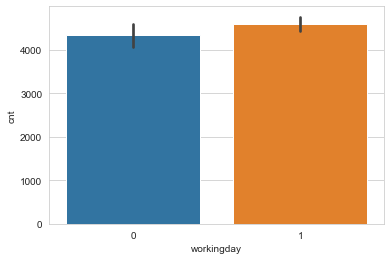

In [23]:
# workingday

print(df['workingday'].value_counts())

sns.set_style('whitegrid')
sns.barplot(df['workingday'], df['cnt'])
plt.show()

Here, 1 is neither weekend nor holiday, otherwise is 0.

There is a high need of bikes neither weekend nor holiday

Aug    62
Jul    62
Jan    62
May    62
Oct    62
Dec    62
Mar    62
Nov    60
Jun    60
Apr    60
Sep    60
Feb    56
Name: mnth, dtype: int64


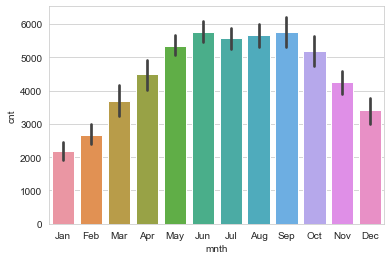

In [24]:
# mnth

print(df['mnth'].value_counts())

sns.set_style('whitegrid')
sns.barplot(df['mnth'],df['cnt'])
plt.show()

From the above graph, we noticed that from june to september there is demand for shared bikes

Sunday       105
Monday       105
Saturday     105
Friday       104
Tuesday      104
Thursday     104
Wednesday    103
Name: weekday, dtype: int64


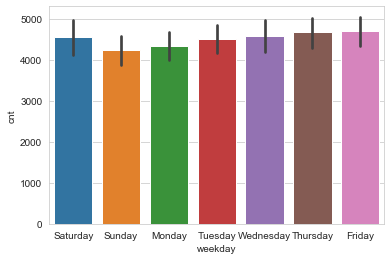

In [25]:
# weekday

print(df['weekday'].value_counts())

sns.set_style('whitegrid')
sns.barplot(df['weekday'],df['cnt'])
plt.show()

Here, we observed that there is more demand of shared bikes on saturdays.

Clear cloudy    463
Mist cloudy     246
Light Snow       21
Name: weathersit, dtype: int64


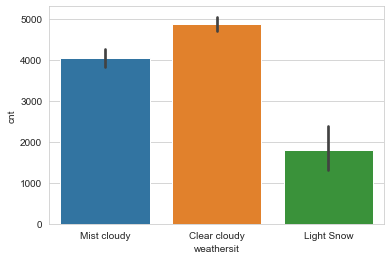

In [26]:
# weathersit

print(df['weathersit'].value_counts())
sns.set_style('whitegrid')

sns.barplot(df['weathersit'],df['cnt'])
plt.show()

Here we could see that the count of total rental bikes bookings are more at clear cloudy time.

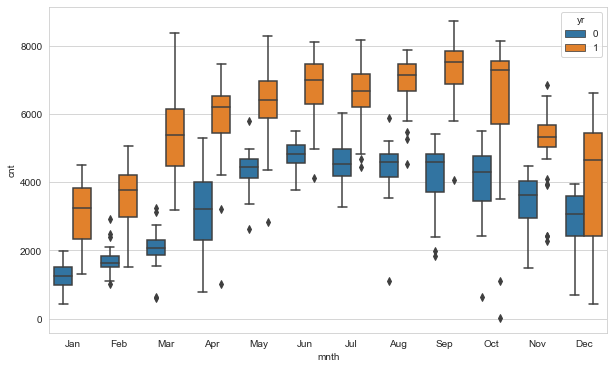

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot('mnth','cnt', hue ='yr',data=df)
plt.show()

We observed that, count of total rental bikes are high in 2019 and comparitively with all other months may to sep the count of total rental bikes are high. 

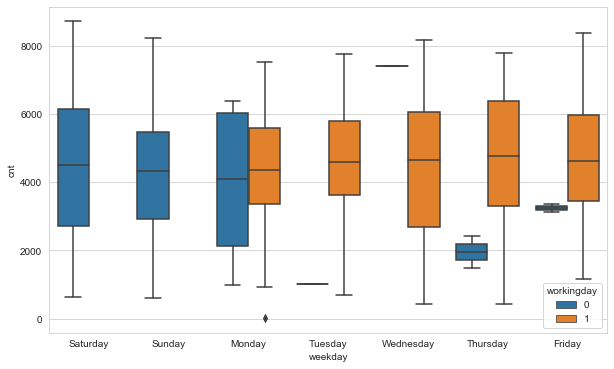

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot('weekday','cnt', hue ='workingday',data=df)
plt.show()

Here, we observed that sunday and monday are having less count of bike rentals

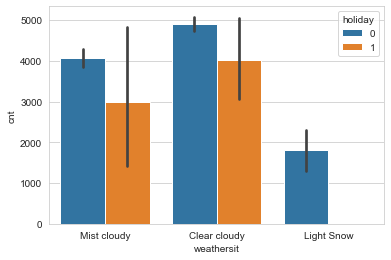

In [29]:
sns.barplot('weathersit','cnt', hue ='holiday',data=df)
plt.show()

We could see that clear cloudy is the perfect time for rides weather it's a holiday or not.

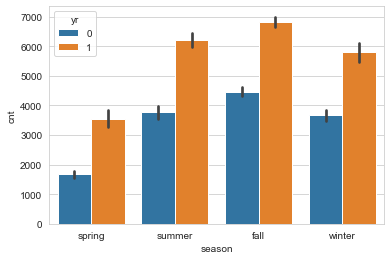

In [30]:
sns.barplot('season','cnt', hue ='yr',data=df)
plt.show()

Here, we observed that fall-2019 has more count of rental bikes whereas less prefered rides are at spring season

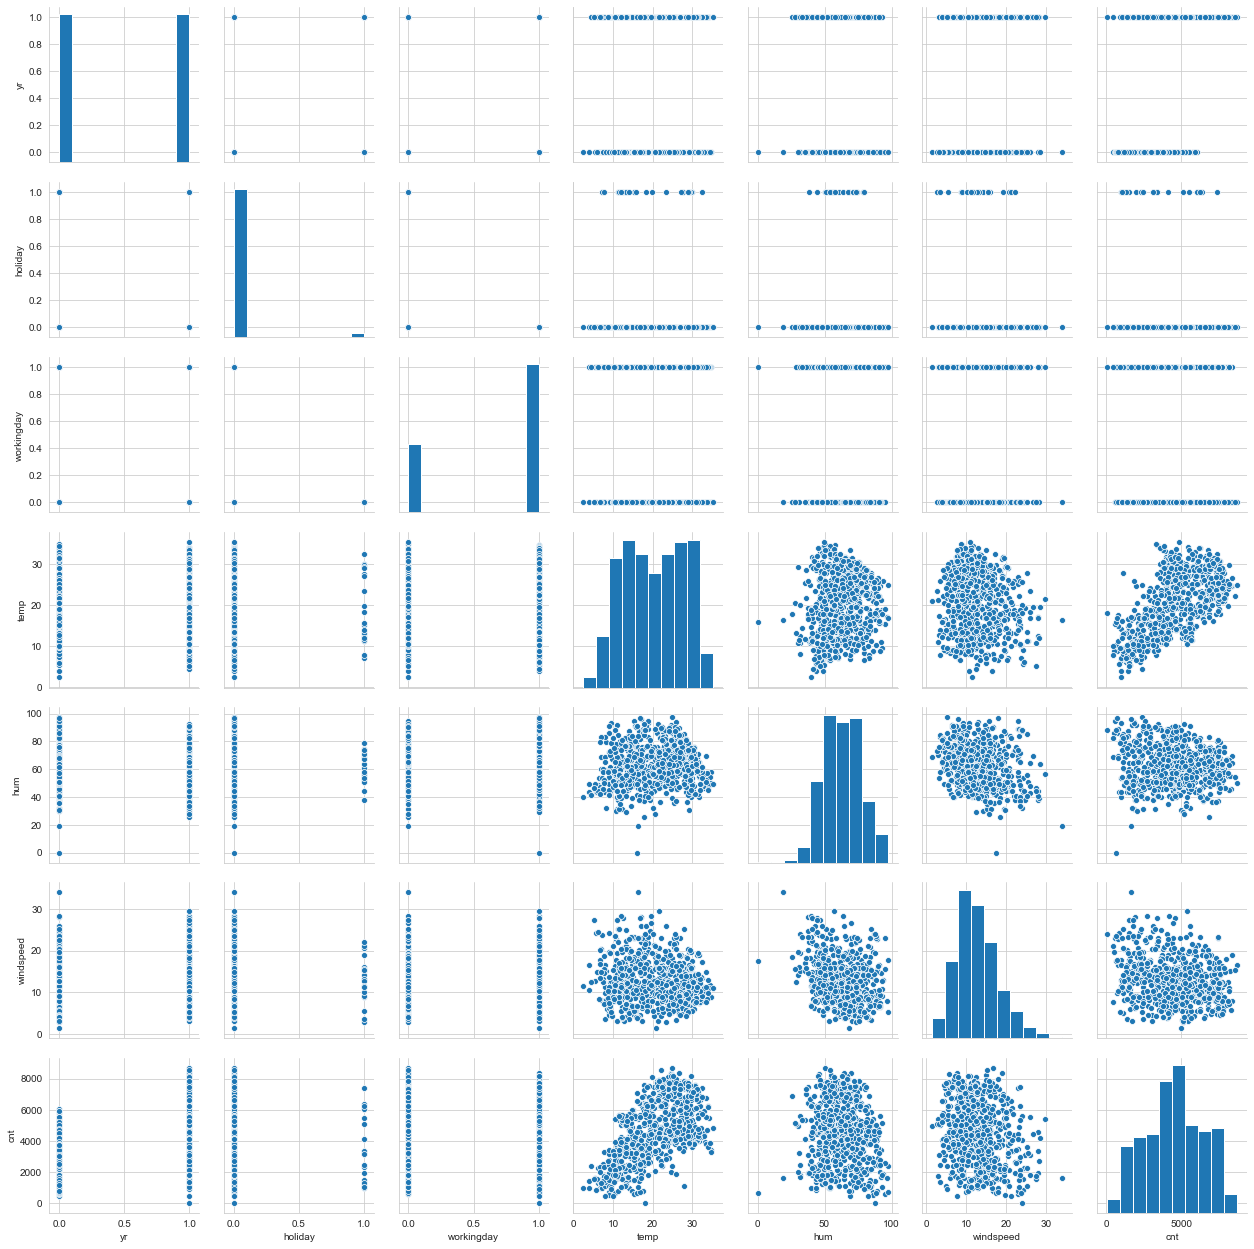

In [31]:
# let's see the pair plot for all the varibales

sns.pairplot(df)
plt.show()

We could see here, temp variable has the high correlation with the target variable cnt.

### Correlation

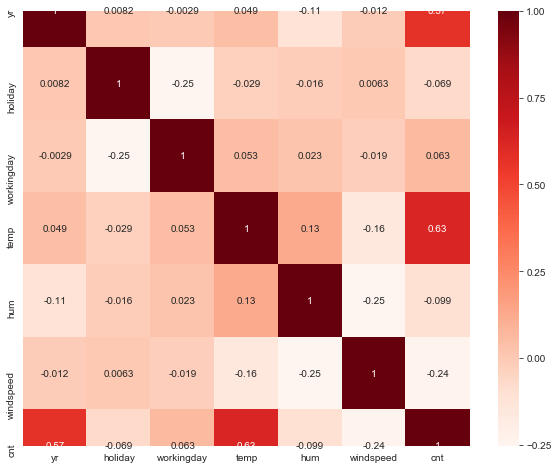

In [32]:
# Checking the correlation using heatmap

corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr , annot=True, cmap='Reds')
plt.show()

In [33]:
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr = pd.DataFrame(corr.unstack().reset_index().sort_values(by=0 , ascending=False))
corr.head(10)

,level_0,level_1,0
45,cnt,temp,0.627044
42,cnt,yr,0.569728
31,hum,temp,0.128565
44,cnt,workingday,0.062542
23,temp,workingday,0.053470
21,temp,yr,0.048789
30,hum,workingday,0.023202
7,holiday,yr,0.008195
36,windspeed,holiday,0.006257
14,workingday,yr,-0.002945


##### Points to be concluded from above correlation table:

1. There is a correlation between count of total rental bikes and temperature.
2. There is a correlation between count of total rental bikes and year.
3. There is a correlation between humidity and temperature.
4. There is a correlation between count of total rental bikes and working day.
5. There is a correlation between temperature and working day.
6. There is a correlation between temperature and year.
7. There is a correlation between humidity and workingday.
8. There is a correlation between holiday and year.
9. There is a correlation between wind speed and holiday.
10. There is a correlation between working day and year.

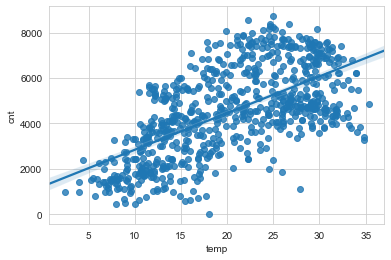

In [34]:
# cheking the linear regression visualisation 

sns.regplot('temp', 'cnt', data=df)
plt.show()

# Dummy variables 

In [35]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear cloudy,9.305237,43.6957,12.522300,1600


In [36]:
# Dummies the categorial variables

status = pd.get_dummies(df[['season','mnth','weekday','weathersit']] , drop_first=True)

In [37]:
pd.set_option('display.max_columns', 50)
status.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist cloudy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
# Concat df and dummy variables

df1 = pd.concat([df,status], axis=1)

In [39]:
pd.set_option('display.max_columns', 50)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist cloudy
0,spring,0,Jan,0,Saturday,0,Mist cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear cloudy,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear cloudy,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear cloudy,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
season                    730 non-null object
yr                        730 non-null int64
mnth                      730 non-null object
holiday                   730 non-null int64
weekday                   730 non-null object
workingday                730 non-null int64
weathersit                730 non-null object
temp                      730 non-null float64
hum                       730 non-null float64
windspeed                 730 non-null float64
cnt                       730 non-null int64
season_spring             730 non-null uint8
season_summer             730 non-null uint8
season_winter             730 non-null uint8
mnth_Aug                  730 non-null uint8
mnth_Dec                  730 non-null uint8
mnth_Feb                  730 non-null uint8
mnth_Jan                  730 non-null uint8
mnth_Jul                  730 non-null uint8
mnth_Jun                  730 

In [41]:
print(df1.columns)
print(df1.shape)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Snow', 'weathersit_Mist cloudy'],
      dtype='object')
(730, 33)


In [42]:
# Removing the categorial variables which already dummified

bike = df1[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist cloudy']]

In [43]:
# Checking the shape of the final data 

print(bike.shape)
bike.head()

(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# MODEL

In [44]:
# splitting train and test from the final bike dataset

df_train , df_test  = train_test_split(bike, train_size=0.70, random_state=100)

In [45]:
# Checking the shapes of the train and test set

print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [46]:
# Applying the scaling on the train sets(normalization/Min-Max approach)
# Creating an object 

scaler = MinMaxScaler()

In [47]:
# scaling the numeric variables and fit and transform the scaling variables

num_var = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [48]:
df_train.describe() # Checking the min and max for the data

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can observe here, all the dataset variables min and max are equals to 0 and 1 respectively.

In [49]:
# diving the x and y from train data

y_train = df_train.pop('cnt')
x_train = df_train

In [50]:
# Cheking the shape of the x and y 

print(x_train.shape)
print(y_train.shape)

(510, 28)
(510,)


In [51]:
# creating a linear regression object

lm = LinearRegression()

In [52]:
# fit the x and y into the object

lm = lm.fit(x_train,y_train)

In [53]:
# creating a RFE (Recursive feature elimination) object

rfe = RFE(lm,15)

In [54]:
# fit the x and y train set to RFE object

rfe = rfe.fit(x_train,y_train)

In [55]:
# Checking support varibales and rankings which is useful of modelling 

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True False  True False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 12  1  8  1  7 10
  9 11  1  1]


In [56]:
# List down the all varibales with support to model and there respective ratings

list(zip(x_train.columns , rfe.support_ ,rfe.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist cloudy', True, 1)]

In [57]:
# Getting the right variables for model

col = x_train.columns[rfe.support_]

In [58]:
# Taking the right variables from x train set

x_train = x_train[col]

In [59]:
x_train.head() # Checking the x-train set

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow,weathersit_Mist cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [60]:
# Creating model with all the variables and their respective variables VIF's  ** 1st model **

# MODEL 

x_train_sm = sm.add_constant(x_train) # Adding Constant to the x_train
lr = sm.OLS(y_train , x_train_sm) # Creating OLS for x and y train set
lr_model = lr.fit() # fit the model
print(lr_model.summary()) # Checking the model summary

# VIF(multicollinearity)

vif = pd.DataFrame()
vif['variables'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif.sort_values('VIF' , ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.22e-191
Time:                        13:56:16   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,variables,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Mist cloudy,2.29
0,yr,2.09
12,weekday_Saturday,1.98


We can observe that all the variables P-values in the model are < 0.05 which is a good model.

But there is high VIF values which leads to multicollinearity.

In [61]:
# Droping the high VIF(multicollinearity) variable (hum = 29.37 > 5)

x_train.drop('hum', axis=1, inplace=True)

# MODEL 

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

# VIF

vif = pd.DataFrame()
vif['variables'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif.sort_values('VIF' , ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.60e-188
Time:                        13:56:16   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,variables,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,yr,2.08
7,season_winter,1.98
11,weekday_Saturday,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


All P-Values are below 0.05, So model is significant, but temp and workingday are having high VIF > 5%.

        temp       = 7.07
        workingday = 5.24
        
temp variable can not be dropped because the temp variable has good correlation with target variable(cnt).

In [62]:
# Droping the high VIF(multicollinearity) variable(workingday = 5.24)

x_train.drop('workingday', axis=1, inplace=True)

# MODEL 

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

# VIF

vif = pd.DataFrame()
vif['variables'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif.sort_values('VIF' , ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.48e-186
Time:                        13:56:16   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,variables,VIF
2,temp,5.16
3,windspeed,4.64
4,season_spring,2.76
5,season_summer,2.24
0,yr,2.07
6,season_winter,1.80
7,mnth_Jan,1.61
8,mnth_Jul,1.59
12,weathersit_Mist cloudy,1.56
9,mnth_Sep,1.34


We observe that weekday_Saturday P-Value is 0.075 which is > than 0.05 which is insignificant to model, So dropping the weekday_Saturday variable.

In [63]:
# Droping high p-value variable(weekday_Saturday = 0.075), which is insignificant to model

x_train.drop('weekday_Saturday', axis=1, inplace=True)

# MODEL 

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

# VIF

vif = pd.DataFrame()
vif['variables'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif.sort_values('VIF' , ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.14e-187
Time:                        13:56:17   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,variables,VIF
2,temp,5.13
3,windspeed,4.62
4,season_spring,2.75
5,season_summer,2.24
0,yr,2.07
6,season_winter,1.78
7,mnth_Jan,1.61
8,mnth_Jul,1.59
11,weathersit_Mist cloudy,1.56
9,mnth_Sep,1.34


All P-Values are below 0.05. So, droping the variable windspeed =  4.62 

In [64]:
# Droping the high VIF varibale(windspeed )

x_train.drop('windspeed', axis=1, inplace=True)

# MODEL 

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

# VIF

vif = pd.DataFrame()
vif['variables'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif.sort_values('VIF' , ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.83e-180
Time:                        13:56:17   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,variables,VIF
2,temp,4.28
0,yr,2.07
3,season_spring,1.99
4,season_summer,1.94
6,mnth_Jan,1.60
7,mnth_Jul,1.59
5,season_winter,1.57
10,weathersit_Mist cloudy,1.56
8,mnth_Sep,1.34
9,weathersit_Light Snow,1.07


We observe that mnth_Jan has high P-Value is 0.192 > 0.05, which is insignificant to model. 

In [65]:
# Droping the high P-Value varibale (mnth_Jan = 0.192 > 0.05) 

x_train.drop('mnth_Jan', axis=1, inplace=True)

# MODEL 

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

# VIF

vif = pd.DataFrame()
vif['variables'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif.sort_values('VIF' , ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.71e-181
Time:                        13:56:17   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,variables,VIF
2,temp,4.22
0,yr,2.06
4,season_summer,1.94
6,mnth_Jul,1.58
5,season_winter,1.57
9,weathersit_Mist cloudy,1.55
3,season_spring,1.40
7,mnth_Sep,1.34
8,weathersit_Light Snow,1.07
1,holiday,1.04


We observe that after dropping mnth_Jan model is good with all P-Values and VIF's values.

Let's drop workingday and see how model behaves.

In [66]:
#  Droping the season_summer variable  

x_train.drop('season_summer', axis=1, inplace=True)

# MODEL 

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train , x_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

# VIF

vif = pd.DataFrame()
vif['variables'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif.sort_values('VIF' , ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.25e-181
Time:                        13:56:17   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,variables,VIF
2,temp,2.99
0,yr,2.05
8,weathersit_Mist cloudy,1.51
4,season_winter,1.33
5,mnth_Jul,1.33
3,season_spring,1.25
6,mnth_Sep,1.19
7,weathersit_Light Snow,1.06
1,holiday,1.04


We observe that after dropping mnth_Jan model is good with all P-Values and VIF's values and only 0.1% of R-Squared decreased and the variables count also reduced

##### Final model is with nine independent variables,
    R-squared     : 0.822
    Adj. R-squared: 0.819
    
    There is no much difference between R-squared (82%) and Adj. R-squared (81%).

## Residual Analysis of the train data

In [67]:
# finding the predictions for y train set

y_train_pred = lr_model.predict(x_train_sm)

In [68]:
# Cheking the Residual analysis for train set

res = y_train - y_train_pred

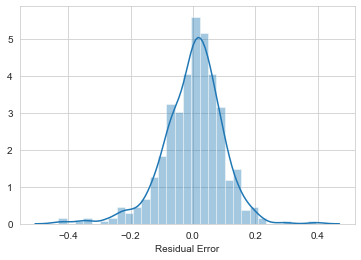

In [69]:
# let's plot the histogram of the error terms.

sns.set_style(style = None, rc = None)
sns.distplot(res)
plt.xlabel('Residual Error') 
plt.show()

We observed that the trian residual error are in normally distributed.

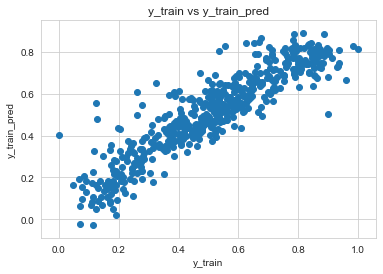

In [70]:
# Plot the train target values and predicted values

plt.scatter(y_train ,y_train_pred)
plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

We observed from the above plot that both the variables variance are at same spot, we did not find much difference.

## Making Predictions (Test Set)

In [71]:
# Checking the test set 

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [72]:
# Applying the scaling on the test set

num_var = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_var] = scaler.transform(df_test[num_var])

In [73]:
df_test.describe() # let's see the test set after scaling

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# Splitting the x and y  from test set

y_test = df_test.pop('cnt')
x_test = df_test

In [75]:
# Removing the train dropped varibales in the test set as well

x_test = x_test[col]

In [76]:
x_test.head() # checking the x test after dropping  

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow,weathersit_Mist cloudy
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0


In [77]:
# Dropping the varibles which has high VIF and P-Value

x_test.drop(['hum','mnth_Jan','windspeed','workingday','weekday_Saturday','season_summer'], axis=1, inplace=True)

In [78]:
x_test.head() # checking the x test after dropping

,yr,holiday,temp,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_Light Snow,weathersit_Mist cloudy
184,0,1,0.831783,0,0,1,0,0,1
535,1,0,0.901354,0,0,0,0,0,0
299,0,0,0.511964,0,1,0,0,0,1
221,0,0,0.881625,0,0,0,0,0,0
152,0,0,0.817246,0,0,0,0,0,0


In [79]:
x_train.head() # Comparing the test set independent variables with train set independent variables 

,yr,holiday,temp,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_Light Snow,weathersit_Mist cloudy
576,1,0,0.815169,0,0,1,0,0,0
426,1,0,0.442393,1,0,0,0,0,1
728,1,0,0.245101,1,0,0,0,0,0
482,1,0,0.395666,0,0,0,0,0,1
111,0,0,0.345824,0,0,0,0,0,1


In [80]:
x_test_sm = sm.add_constant(x_test) # Adding constant to the x test set

In [81]:
# finding the predictions for y test set

y_test_pred = lr_model.predict(x_test_sm)

In [82]:
# Cheking the Residual analysis for test set

res_test = y_test - y_test_pred 

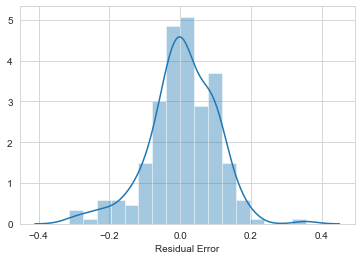

In [83]:
# let's plot the histogram of the test set error terms.

sns.distplot(res_test)
sns.set_style(style = None, rc = None)
plt.xlabel('Residual Error') 
plt.show()

We observed that the test residual error are in normally distributed.

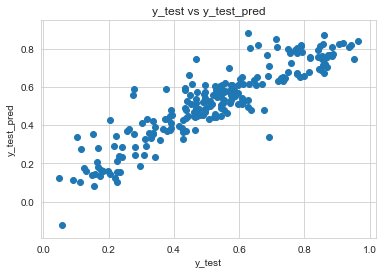

In [84]:
# Plot the test target values and test predicted values

plt.scatter(y_test ,y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

We observed from the above plot that both the variables variance are at same spot, we did not find much difference.

In [85]:
# let's check the RSquared for train set and test set

print("Train set R-Squared is ",r2_score(y_train,y_train_pred))
print("Test set R-Squared is ",r2_score(y_test,y_test_pred))

Train set R-Squared is  0.8218825344337094
Test set R-Squared is  0.8096078487662723


In [86]:
# Final model R-Squared and Adjusted R-Squared values for test set

ajr2_train =  1 - (((1- r2_score(y_train,y_train_pred))*(x_train.shape[0] - 1)) / (x_train.shape[0] - 8 -1 ))
print("Train set R-Squared is ",r2_score(y_train,y_train_pred))
print("Train Adjusted R-Squared",ajr2_train)

Train set R-Squared is  0.8218825344337094
Train Adjusted R-Squared 0.8190383433667826


In [87]:
# Final model R-Squared and Adjusted R-Squared values for test set

adjr2_test =  1 - (((1- r2_score(y_test,y_test_pred))*(x_test.shape[0] - 1)) / (x_test.shape[0] - 8 -1 ))
print("Test set R-Squared is ",r2_score(y_test,y_test_pred))
print("Test Adjusted R-Squared",adjr2_test)

Test set R-Squared is  0.8096078487662723
Test Adjusted R-Squared 0.8023891890038561


From the above final model R-Squared and Adjusted R-Squared values for train set and test set are with less difference.

And, test and train R-Squared and Adjusted R-Squared values are decent values.

In [88]:
# Finding the mean squared error for train and test

print(mean_squared_error(y_test,y_test_pred) )
print(mean_squared_error(y_train,y_train_pred))

0.009103463535116927
0.008953246485884345


We could see here, the mean squared error for train and test is very low.

# Model Conclusion 

Y=C+MX

Y = 0.1952 + (0.2332 * yr) + (-0.1006 * holiday) + (0.4695 * temp) + (-0.1122 * season_spring) + (0.0534 * season_winter) + (-0.0690 * mnth_Jul) + (0.0654 * mnth_Sep) + (-0.2993 * weathersit_Light Snow) + (-0.0781 * weathersit_Mist cloudy)

## Recommendation

    There is more rental bike demand in winter and fall seasons.
    
    The demand for shared bikes is highly correlative with temperature.
    
    The weather condition of Clear, Few clouds, partly cloudy having the significantly high demand of shared bikes and good time for business. 
    
    The months of the September having high demand of rental bikes. So, September month is good for business.
    
    Long running business are more profitable business.